## Descriptive analysis of demographic data

The International Data Base (IDB) of the U.S. Census Bureau contains various demographic
data (currently from 1950 to 2100) on all states and regions of our world that are
recognized by the US Department of State and have a population of 5000 or more. The
sources of the database are information from state institutions, such as censuses, surveys
or administrative records, as well as estimates and projections by the U.S. Census Bureau
itself.
The dataset in the file census2004_2024.csv contains a small extract from the IDB. It
includes life expectancy at birth and under age 5 mortality rates for 227 countries from
2004 and 2024. For the exact definitions of these variables see https://www.census.gov/
programs-surveys/international-programs/about/glossary.html. Both variables
are stratified by sex, and the countries are divided geographically into 5 regions and 21
subregions. For further details regarding data collection see https://www.census.gov/
programs-surveys/international-programs/about/idb.html.

In [242]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [243]:
#loading dataset
mydata = pd.read_csv("census2004_2024.csv")

In [244]:
#display dataset
mydata

,Name,Year,Life.Expectancy.at.Birth..Both.Sexes,Life.Expectancy.at.Birth..Males,Life.Expectancy.at.Birth..Females,Under.Age.5.Mortality..Both.Sexes,Under.Age.5.Mortality..Males,Under.Age.5.Mortality..Females,Subregion,Region
0,Afghanistan,2004,46.7,45.6,47.8,208.6,215.5,201.4,South-Central Asia,Asia
1,Albania,2004,75.3,72.6,78.2,19.9,21.0,18.7,Southern Europe,Europe
2,Algeria,2004,73.7,72.9,74.7,37.2,39.0,35.3,Northern Africa,Africa
3,American Samoa,2004,70.8,68.3,73.4,17.7,20.6,14.6,Polynesia,Oceania
4,Andorra,2004,81.3,79.8,82.9,5.8,4.9,6.8,Southern Europe,Europe
...,...,...,...,...,...,...,...,...,...,...
449,Wallis and Futuna,2024,81.1,78.2,84.2,4.3,4.3,4.4,Polynesia,Oceania
450,West Bank,2024,76.5,74.4,78.8,17.9,20.6,15.0,Western Asia,Asia
451,Yemen,2024,68.2,65.8,70.6,59.2,64.8,53.2,Western Asia,Asia
452,Zambia,2024,66.9,65.2,68.7,51.3,55.3,47.1,Eastern Africa,Africa


In [245]:
#rename dataset
mydata.rename(columns={'Name':'Country','Life.Expectancy.at.Birth..Both.Sexes': 'Life_Expectancy_Both',
    'Life.Expectancy.at.Birth..Males': 'Life_Expectancy_Males',
    'Life.Expectancy.at.Birth..Females': 'Life_Expectancy_Females',
    'Under.Age.5.Mortality..Both.Sexes': 'Under_5_Mortality_Both',
    'Under.Age.5.Mortality..Males': 'Under_5_Mortality_Males',
    'Under.Age.5.Mortality..Females': 'Under_5_Mortality_Females'}, inplace=True)




In [246]:
#check for empty columns and drop if needed
empty_columns = mydata.columns[mydata.isnull().all()]
print("Empty Columns:\n", empty_columns)


Empty Columns:
 Index([], dtype='object')


In [247]:
#check for missing values
missing_values = mydata.isnull().sum()
print("Missing values: \n", missing_values)

Missing values: 
 Country                      0
Year                         0
Life_Expectancy_Both         5
Life_Expectancy_Males        5
Life_Expectancy_Females      5
Under_5_Mortality_Both       5
Under_5_Mortality_Males      5
Under_5_Mortality_Females    5
Subregion                    4
Region                       4
dtype: int64


In [248]:
#drop missing values 
#cleaned_data = mydata.dropna()

In [249]:
#we will fill the missing values instead of dropping because there are no rows with missing values on all columns at the same time
#mean or median
mydata = mydata.fillna({
    'Life_Expectancy_Both': mydata['Life_Expectancy_Both'].median(),
    'Life_Expectancy_Males': mydata['Life_Expectancy_Males'].median(),
    'Life_Expectancy_Females': mydata['Life_Expectancy_Females'].median(),
    'Under_5_Mortality_Both': mydata['Under_5_Mortality_Both'].median(),
    'Under_5_Mortality_Males': mydata['Under_5_Mortality_Males'].median(),
    'Under_5_Mortality_Females': mydata['Under_5_Mortality_Females'].median(),
    })
mydata['Subregion'] = mydata['Subregion'].fillna(mydata['Subregion'].mode()[0])
mydata['Region'] = mydata['Region'].fillna(mydata['Region'].mode()[0])
#print(mydata.info())

In [250]:
#save the cleaned dataset
mydata.to_csv('cleaned_census2004_2024.csv', index=False)

##### Task 1: Describe the frequency distributions of the variables. Consider also the differences between the sexes and region, consider only the year 2024.

In [251]:
#Filter 2024 data
data2024 = mydata[mydata['Year'] == 2024]

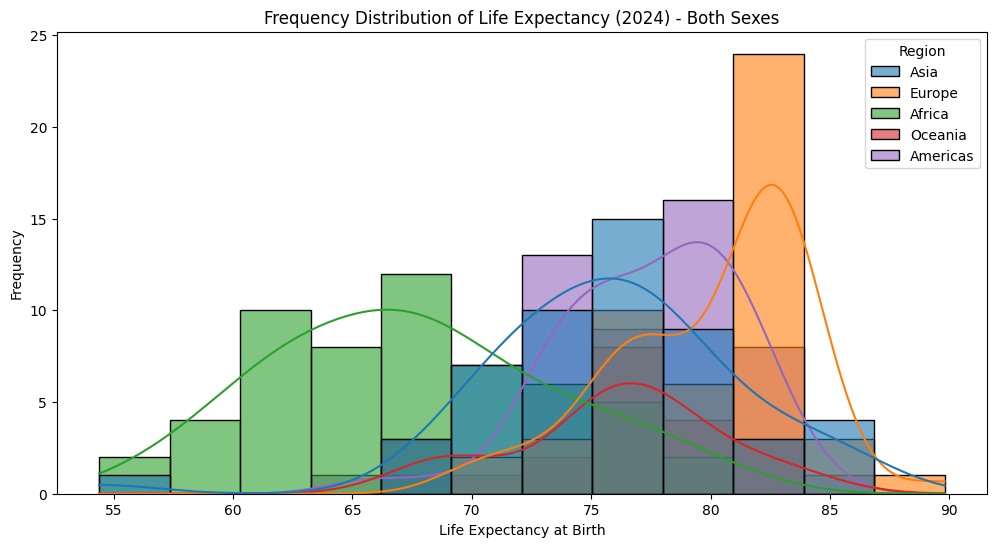

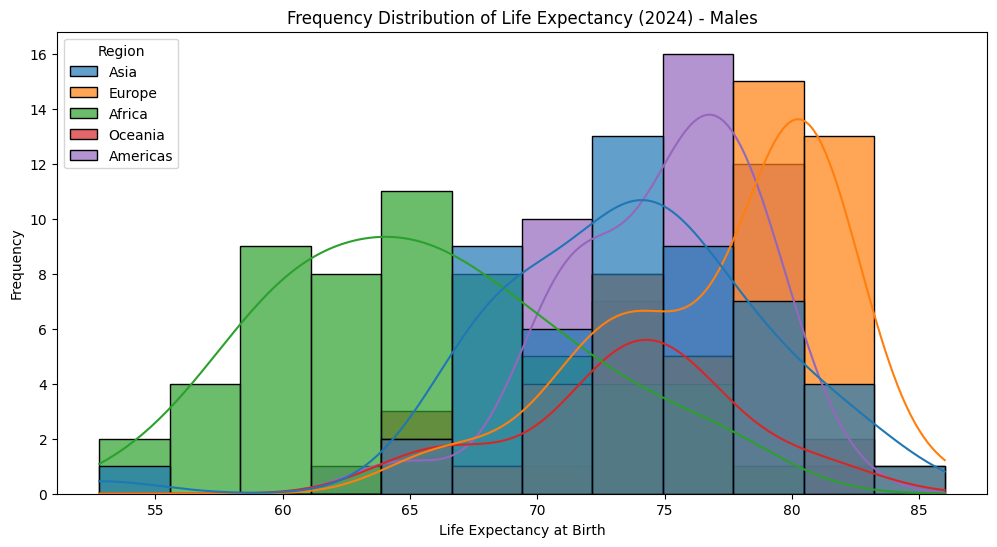

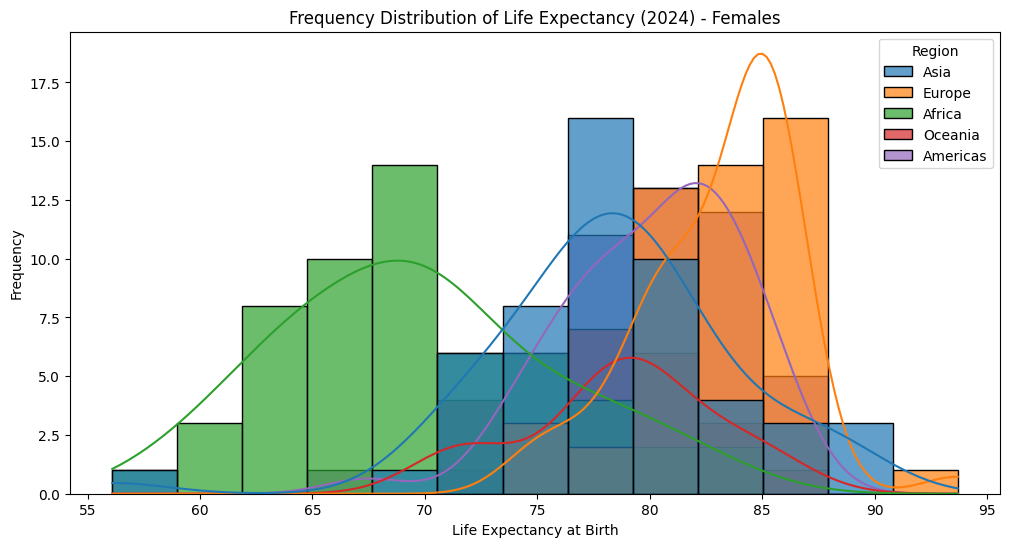

In [252]:
life_expectancy_summary = data2024[['Life_Expectancy_Both',
                                     'Life_Expectancy_Males',
                                     'Life_Expectancy_Females']].describe()
#print("Life Expectancy Summary (2024):\n", life_expectancy_summary)

#frequencz distribution for life expectancy wrt sexes and region
plt.figure(figsize=(12, 6))
sns.histplot(data=data2024, x='Life_Expectancy_Both', kde=True, hue = 'Region', color ='yellow', label='Both Sexes', alpha = 0.6)
#sns.histplot(data=data2024, x='Life_Expectancy_Males', kde=True, color='blue', label='Males', alpha=0.7)
#sns.histplot(data=data2024, x='Life_Expectancy_Females', kde=True, color='pink', label='Females', alpha=0.5)
plt.title('Frequency Distribution of Life Expectancy (2024) - Both Sexes')
plt.xlabel('Life Expectancy at Birth')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=data2024, x='Life_Expectancy_Males', kde=True, hue = 'Region', color ='blue', label='Males', alpha = 0.7)
plt.title('Frequency Distribution of Life Expectancy (2024) - Males')
plt.xlabel('Life Expectancy at Birth')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=data2024, x='Life_Expectancy_Females', kde=True, hue = 'Region', color ='pink', label='Females', alpha = 0.7)
plt.title('Frequency Distribution of Life Expectancy (2024) - Females')
plt.xlabel('Life Expectancy at Birth')
plt.ylabel('Frequency')
plt.show()

##### Results: Females generally have a higher life expectancy, as shown by the peak shifting to the right compared to males.  The curves are fairly symmetric, suggesting a normal-like distribution.

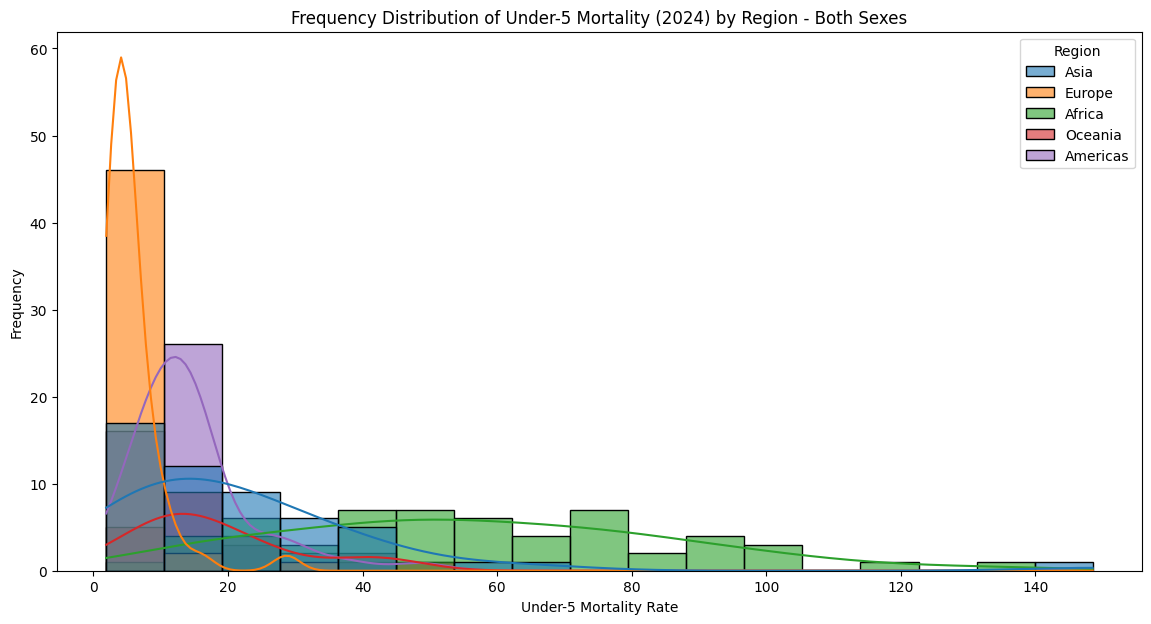

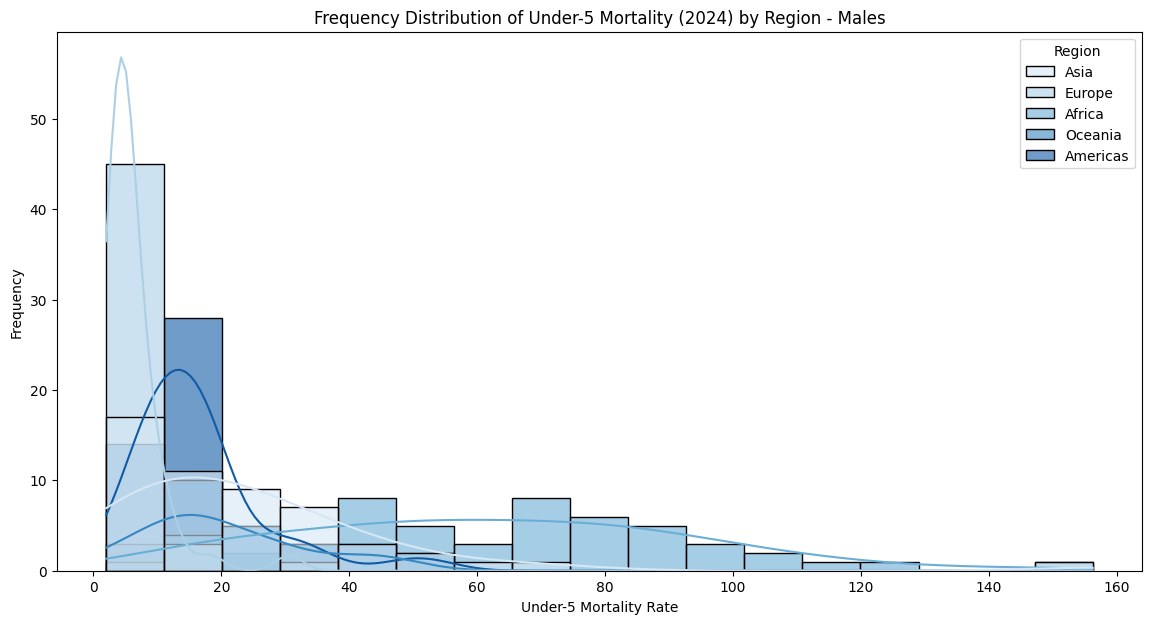

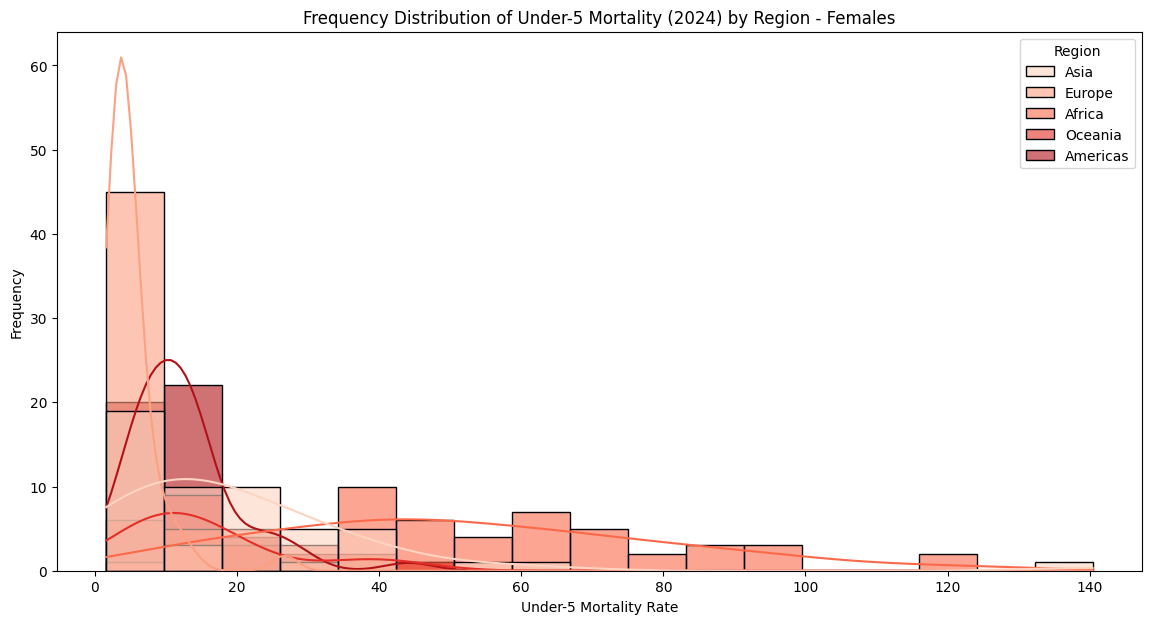

In [253]:
mortality_summary = data2024[['Under_5_Mortality_Both',
                                     'Under_5_Mortality_Males',
                                     'Under_5_Mortality_Females']].describe()
#print("Under-5 Mortality Summary (2024):\n", mortality_summary)



#Frequency Distribution of Under-5 Mortality wrt sexes and region
plt.figure(figsize=(14, 7))
sns.histplot(data=data2024, x='Under_5_Mortality_Both', kde=True, hue='Region', palette='tab10', alpha=0.6)
plt.title('Frequency Distribution of Under-5 Mortality (2024) by Region - Both Sexes')
plt.xlabel('Under-5 Mortality Rate')
plt.ylabel('Frequency')
plt.show()

#Frequency Distribution of Under-5 Mortality for Males with Regions
plt.figure(figsize=(14, 7))
sns.histplot(data=data2024, x='Under_5_Mortality_Males', kde=True, hue='Region', palette='Blues', alpha=0.6)
plt.title('Frequency Distribution of Under-5 Mortality (2024) by Region - Males')
plt.xlabel('Under-5 Mortality Rate')
plt.ylabel('Frequency')
plt.show()

#Frequency Distribution of Under-5 Mortality for Females with Regions
plt.figure(figsize=(14, 7))
sns.histplot(data=data2024, x='Under_5_Mortality_Females', kde=True, hue='Region', palette='Reds', alpha=0.6)
plt.title('Frequency Distribution of Under-5 Mortality (2024) by Region - Females')
plt.xlabel('Under-5 Mortality Rate')
plt.ylabel('Frequency')
plt.show()




##### Results. This highlights health disparities across regions. The similarity in curves between males and females indicates relatively consistent mortality rates across genders. The data is heavily skewed and identifies a public health issue requiring attention in specific regions.

In [254]:
'''
# Adding common styles for different plots
def set_plot_styles(title, xlabel, ylabel):
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)
    plt.tight_layout()
Plot 3: Box Plots for Life Expectancy
plt.figure(figsize=(8, 6))
sns.boxplot(data=data2024[['Life_Expectancy_Both','Life_Expectancy_Males', 'Life_Expectancy_Females']], palette="pastel")
set_plot_styles("Box Plot of Life Expectancy (2024)", "Sex", "Life Expectancy at Birth")
plt.xticks(ticks=[0, 1, 2], labels=["Both Sexes", "Males", "Females"], fontsize=12)
#plt.show()

#Plot 4: Violin Plots for Under-5 Mortality
plt.figure(figsize=(8, 6))
sns.violinplot(data=data2024[['Under_5_Mortality_Both', 'Under_5_Mortality_Males', 'Under_5_Mortality_Females']], palette="muted")
set_plot_styles("Violin Plot of Under-5 Mortality (2024)", "Sex", "Under-5 Mortality Rate")
plt.xticks(ticks=[0, 1, 2], labels=["Both Sexes", "Males", "Females"], fontsize=12)
#plt.show()

# Plot 5: Pairplot for Correlation Exploration
sns.pairplot(data=data2024, vars=['Life_Expectancy_Both', 'Life_Expectancy_Males', 
                                   'Life_Expectancy_Females', 'Under_5_Mortality_Both'], 
             kind="scatter", diag_kind="kde", corner=True)
plt.suptitle("Pairplot of Key Variables (2024)", y=1.02, fontsize=16, fontweight='bold')
#plt.show()

# Plot 6: Heatmap for Numerical Correlation
plt.figure(figsize=(10, 8))
correlation_matrix = data2024[['Life_Expectancy_Both', 'Life_Expectancy_Males', 
                                'Life_Expectancy_Females', 'Under_5_Mortality_Both']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
set_plot_styles("Correlation Heatmap (2024)", "Variables", "Variables")
plt.show()'''

'\n# Adding common styles for different plots\ndef set_plot_styles(title, xlabel, ylabel):\n    plt.title(title, fontsize=16, fontweight=\'bold\')\n    plt.xlabel(xlabel, fontsize=14)\n    plt.ylabel(ylabel, fontsize=14)\n    plt.grid(True, alpha=0.3)\n    plt.legend(fontsize=12)\n    plt.tight_layout()\nPlot 3: Box Plots for Life Expectancy\nplt.figure(figsize=(8, 6))\nsns.boxplot(data=data2024[[\'Life_Expectancy_Both\',\'Life_Expectancy_Males\', \'Life_Expectancy_Females\']], palette="pastel")\nset_plot_styles("Box Plot of Life Expectancy (2024)", "Sex", "Life Expectancy at Birth")\nplt.xticks(ticks=[0, 1, 2], labels=["Both Sexes", "Males", "Females"], fontsize=12)\n#plt.show()\n\n#Plot 4: Violin Plots for Under-5 Mortality\nplt.figure(figsize=(8, 6))\nsns.violinplot(data=data2024[[\'Under_5_Mortality_Both\', \'Under_5_Mortality_Males\', \'Under_5_Mortality_Females\']], palette="muted")\nset_plot_styles("Violin Plot of Under-5 Mortality (2024)", "Sex", "Under-5 Mortality Rate")\nplt.

##### Task 2: Are the values of the individual variables comparatively homogeneous within the individual subregions and heterogeneous between different subregions? To answer this question, first analyse the variability of the values within the individual subregions and then compare the measures of central tendency of the individual variables between different subregions, choose one rehion to work with and consider only the year 2024.

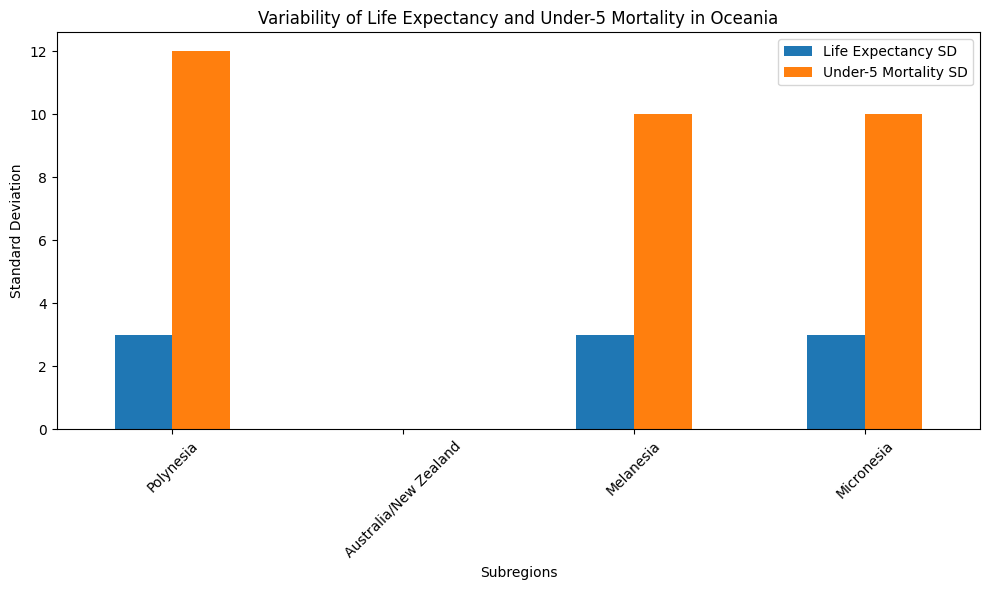

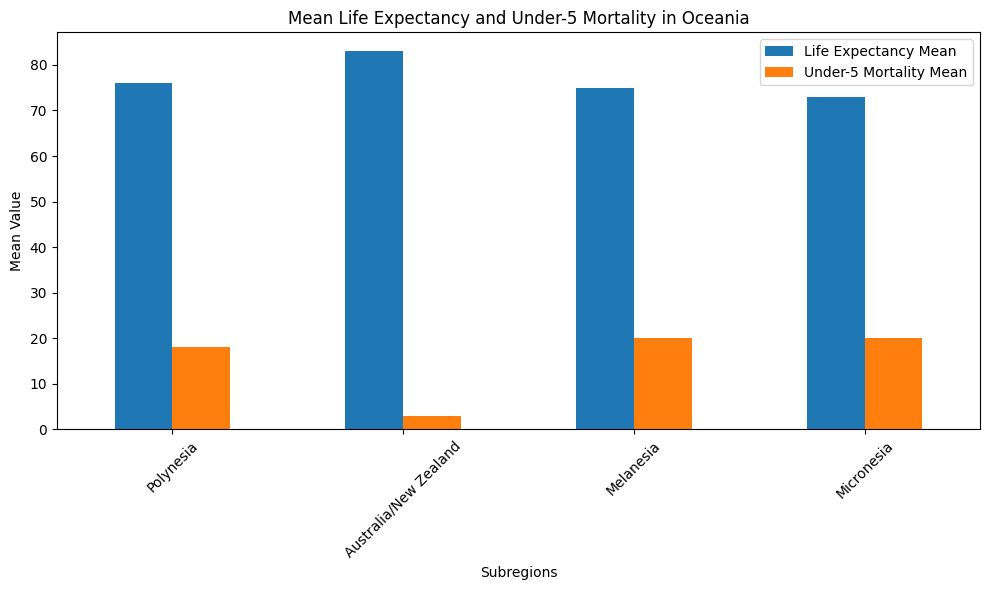

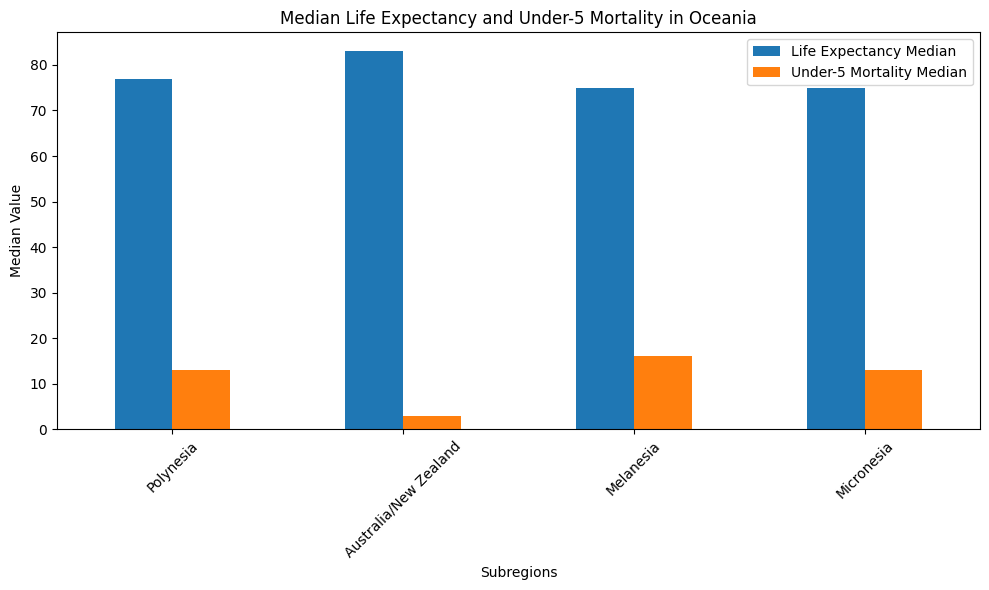

Variability (Standard Deviation) within Subregions:
                       Life Expectancy SD  Under-5 Mortality SD
Polynesia                               3                    12
Australia/New Zealand                   0                     0
Melanesia                               3                    10
Micronesia                              3                    10

Central Tendency (Mean and Median) between Subregions:
                       Life Expectancy Mean  Life Expectancy Median  \
Polynesia                                76                      77   
Australia/New Zealand                    83                      83   
Melanesia                                75                      75   
Micronesia                               73                      75   

                       Under-5 Mortality Mean  Under-5 Mortality Median  
Polynesia                                  18                        13  
Australia/New Zealand                       3                       

In [255]:
#Filter data for Region Oceania
myregion = 'Oceania'
dataregion = data2024[(data2024['Region'] == myregion)]

subregions = dataregion['Subregion'].unique()

#Calculate variability (standard deviation) within subregions
variability = {}
for subregion in subregions:
    subregion_data = dataregion[dataregion['Subregion'] == subregion]
    
    # Calculate standard deviation for life expectancy and under-5 mortality rates
    variability[subregion] = {
        'Life Expectancy SD': int(np.std(subregion_data['Life_Expectancy_Both'])),
        'Under-5 Mortality SD': int(np.std(subregion_data['Under_5_Mortality_Both']))
    }
#Calculate central tendency (mean, median) for each subregion
central_tendency = {}
for subregion in subregions:
    subregion_data = dataregion[dataregion['Subregion'] == subregion]
    
    central_tendency[subregion] = {
        'Life Expectancy Mean': int(np.mean(subregion_data['Life_Expectancy_Both'])),
        'Life Expectancy Median': int(np.median(subregion_data['Life_Expectancy_Both'])),
        'Under-5 Mortality Mean': int(np.mean(subregion_data['Under_5_Mortality_Both'])),
        'Under-5 Mortality Median': int(np.median(subregion_data['Under_5_Mortality_Both']))
    }

#Convert results to DataFrame
variability_df = pd.DataFrame(variability).T
central_tendency_df = pd.DataFrame(central_tendency).T

#Plot the standard deviations for both variables across subregions
variability_df.plot(kind='bar', figsize=(10, 6))
plt.title(f'Variability of Life Expectancy and Under-5 Mortality in {myregion}')
plt.ylabel('Standard Deviation')
plt.xlabel('Subregions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Plot the means of life expectancy and under-5 mortality rates across subregions
central_tendency_df[['Life Expectancy Mean', 'Under-5 Mortality Mean']].plot(kind='bar', figsize=(10, 6))
plt.title(f'Mean Life Expectancy and Under-5 Mortality in {myregion}')
plt.ylabel('Mean Value')
plt.xlabel('Subregions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Plot the medians of life expectancy and under-5 mortality rates across subregions
central_tendency_df[['Life Expectancy Median', 'Under-5 Mortality Median']].plot(kind='bar', figsize=(10, 6))
plt.title(f'Median Life Expectancy and Under-5 Mortality in {myregion}')
plt.ylabel('Median Value')
plt.xlabel('Subregions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Output the variability and central tendency tables
print("Variability (Standard Deviation) within Subregions:")
print(variability_df)
print("\nCentral Tendency (Mean and Median) between Subregions:")
print(central_tendency_df)

##### Results: The data shows that the individual variables (life expectancy and under-5 mortality) exhibit relative homogeneity within subregions such as Polynesia, Melanesia, and Micronesia due to their consistent central tendencies and higher variability. Meanwhile, heterogeneity between subregions is evident due to stark differences in both the mean/median values and standard deviations between subregions like Australia/New Zealand and others.

##### Task 3: Are there bivariate correlations between the variables?

                           Life_Expectancy_Both  Life_Expectancy_Males  \
Life_Expectancy_Both                   1.000000               0.992116   
Life_Expectancy_Males                  0.992116               1.000000   
Life_Expectancy_Females                0.992132               0.968700   
Under_5_Mortality_Both                -0.891352              -0.868461   
Under_5_Mortality_Males               -0.889774              -0.868659   
Under_5_Mortality_Females             -0.889939              -0.864967   

                           Life_Expectancy_Females  Under_5_Mortality_Both  \
Life_Expectancy_Both                      0.992132               -0.891352   
Life_Expectancy_Males                     0.968700               -0.868461   
Life_Expectancy_Females                   1.000000               -0.900966   
Under_5_Mortality_Both                   -0.900966                1.000000   
Under_5_Mortality_Males                  -0.897730                0.998574   
Under_5_Morta

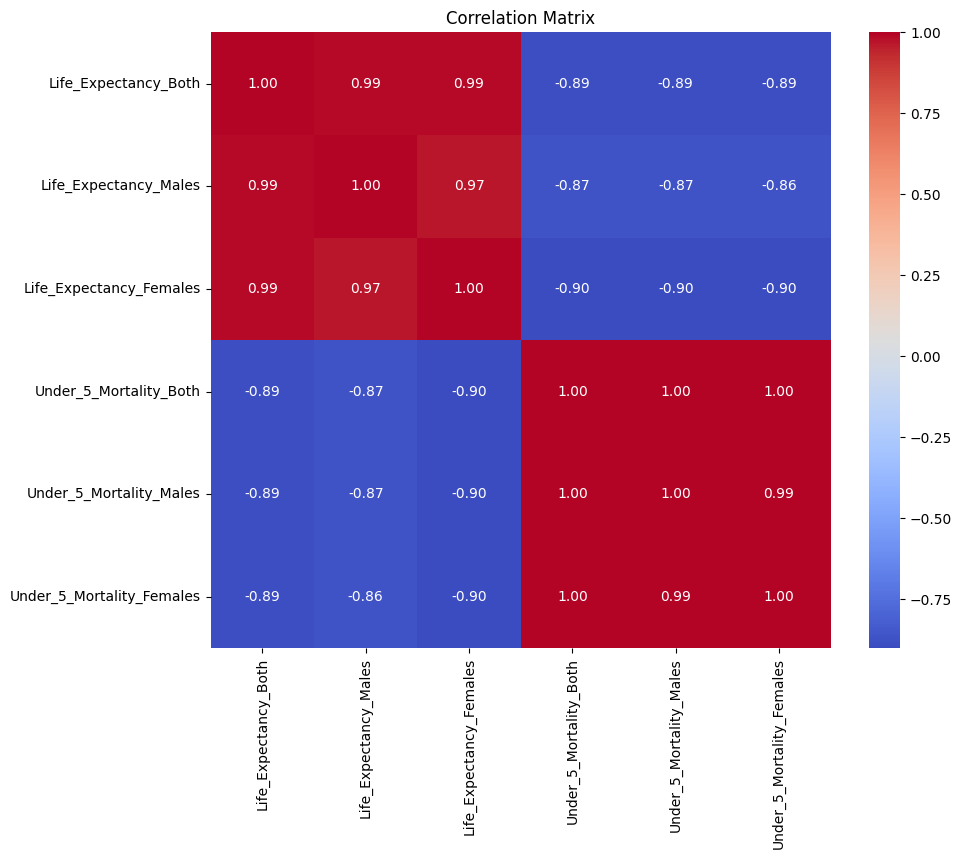

In [256]:
#check bivariate correlations
correlation_matrix = data2024[['Life_Expectancy_Both', 'Life_Expectancy_Males', 
                           'Life_Expectancy_Females', 'Under_5_Mortality_Both',
                           'Under_5_Mortality_Males', 'Under_5_Mortality_Females']].corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



##### Results: Life expectancy variables (both genders) are strongly positively correlated with each other (r ≈ 0.98). Life expectancy and under-5 mortality rates exhibit a strong negative correlation (r ≈ -0.85), indicating that higher life expectancy is associated with lower under-5 mortality.

##### Task 4: How have the values of the variables changed over the last 20 years, i.e. comparing 2004 with 2024?

Summary for 2004:
        Life_Expectancy_Both  Under_5_Mortality_Both
count            227.000000              227.000000
mean              69.641850               44.911454
std                9.171752               48.180120
min               45.600000                1.900000
25%               64.250000               10.600000
50%               72.300000               22.400000
75%               76.100000               68.450000
max               89.800000              208.600000
Summary for 2024:
        Life_Expectancy_Both  Under_5_Mortality_Both
count            227.000000              227.000000
mean              75.064758               25.133921
std                6.654195               26.787115
min               54.400000                1.900000
25%               70.800000                7.150000
50%               76.200000               13.900000
75%               80.100000               34.850000
max               89.800000              148.500000


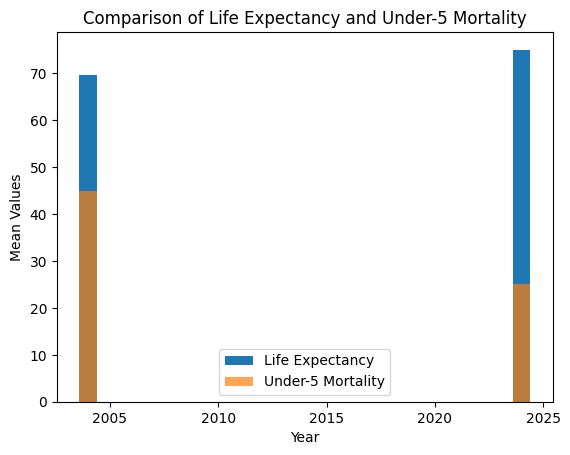

In [257]:
#Filter data for 2004 and 2024
data_2004 = mydata[mydata['Year'] == 2004][['Life_Expectancy_Both', 'Under_5_Mortality_Both']]
data_2024 = mydata[mydata['Year'] == 2024][['Life_Expectancy_Both', 'Under_5_Mortality_Both']]

#Describe for mean, median and SD
summary_2004 = data_2004.describe()
summary_2024 = data_2024.describe()
print("Summary for 2004:\n", summary_2004)
print("Summary for 2024:\n", summary_2024)

means = {
    "Year": [2004, 2024],
    "Life Expectancy (Mean)": [data_2004['Life_Expectancy_Both'].mean(), data_2024['Life_Expectancy_Both'].mean()],
    "Under-5 Mortality (Mean)": [data_2004['Under_5_Mortality_Both'].mean(), data_2024['Under_5_Mortality_Both'].mean()]
}

plt.bar(means['Year'], means['Life Expectancy (Mean)'], label='Life Expectancy')
plt.bar(means['Year'], means['Under-5 Mortality (Mean)'], label='Under-5 Mortality', alpha=0.7)
plt.title('Comparison of Life Expectancy and Under-5 Mortality')
plt.xlabel('Year')
plt.ylabel('Mean Values')
plt.legend()
plt.show()




##### Results: Between 2004 and 2024, the mean life expectancy increased from 69 to 75 years, indicating improvements in global health and living conditions. In the same period, the mean under-5 mortality rate decreased from 45 deaths to 25, reflecting better healthcare access and advancements in medical technology.